In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### airplane sales

airplane_sales = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6316F24/refs/heads/main/final_exam/airplane_sales.csv")

airplane_sales.isna().sum()


,0
0Sale_ID,0
age,0
price,0


In [2]:
airplane_sales.duplicated().sum()

0

In [3]:
airplane_sales.describe()

,0Sale_ID,age,price
count,195.000000,195.000000,195.000000
mean,198.000000,24.610256,50236.733333
std,56.435804,6.952853,41470.291455
min,101.000000,13.000000,9000.000000
25%,149.500000,19.000000,19250.000000
50%,198.000000,22.000000,33500.000000
75%,246.500000,30.000000,73500.000000
max,295.000000,44.000000,254000.000000


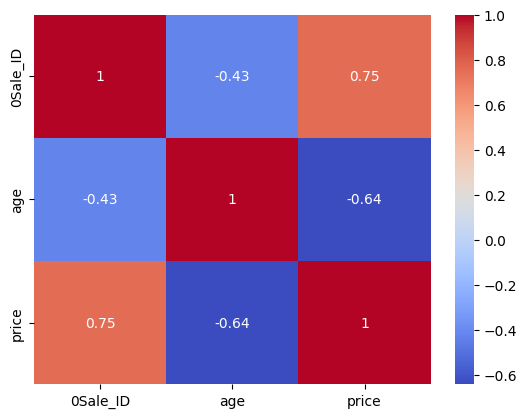

In [4]:
sns.heatmap(airplane_sales.corr(),annot=True,cmap="coolwarm")
plt.show()

In [5]:
## price as a function of age

X = airplane_sales['age']
y = airplane_sales['price']

import statsmodels.api as sm

model1 = sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print(model1.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           5.97e-24
Time:                        16:19:41   Log-Likelihood:                -2298.0
No. Observations:                 195   AIC:                             4600.
Df Residuals:                     193   BIC:                             4607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e+05   8425.999     17.128      0.0

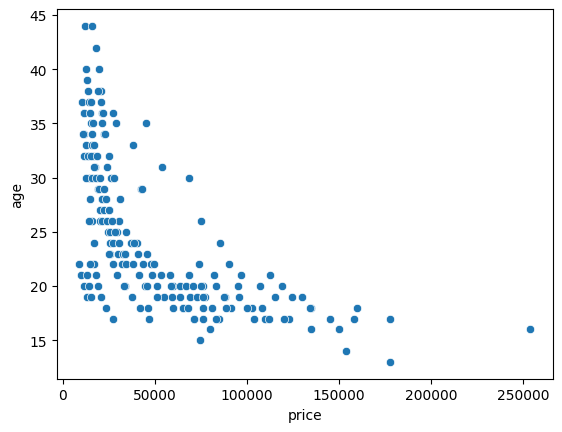

In [6]:
sns.scatterplot(x='price',y='age',data=airplane_sales)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor

X = airplane_sales['age'].to_numpy().reshape(-1,1)
y = airplane_sales['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)






lr = LinearRegression()
BR = BaggingRegressor()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor()

def evaluate_models(X_train,X_test,y_train,y_test,model):
  model = model.fit(X_train,y_train)
  pred = model.predict(X_test)
  r2 = r2_score(y_test,pred)
  mse = mean_squared_error(y_test,pred)
  print(f'{model.__class__.__name__}; --Mean Squared Error-- {mse:.2f}; --r2 score-- {r2*100:.2f}%;')
  return pred




## results from regression
lr_pred = evaluate_models(X_train,X_test,y_train,y_test,lr)
GBC_pred = evaluate_models(X_train,X_test,y_train,y_test,GBR)
BR_pred = evaluate_models(X_train,X_test,y_train,y_test,BR)
RFR_pred = evaluate_models(X_train,X_test,y_train,y_test,RFR)



















LinearRegression; --Mean Squared Error-- 924439364.31; --r2 score-- 44.40%;
GradientBoostingRegressor; --Mean Squared Error-- 731196446.28; --r2 score-- 56.02%;
BaggingRegressor; --Mean Squared Error-- 717329017.91; --r2 score-- 56.85%;
RandomForestRegressor; --Mean Squared Error-- 722494974.54; --r2 score-- 56.54%;


In [8]:
#specs

airplane_specs = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6316F24/refs/heads/main/final_exam/airplane_specs.csv")
airplane_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   0Sale_ID  195 non-null    int64
 1   pass      195 non-null    int64
 2   wtop      195 non-null    int64
 3   fixgear   195 non-null    int64
 4   tdrag     195 non-null    int64
dtypes: int64(5)
memory usage: 7.7 KB


In [9]:
airplane_specs.isnull().sum()

,0
0Sale_ID,0
pass,0
wtop,0
fixgear,0
tdrag,0


In [10]:
airplane_specs.duplicated().sum()

0

In [11]:
#merging the two airplane datasets
airplane_sales_specs = pd.concat([airplane_specs,airplane_sales],axis=1)

airplane_sales_specs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   0Sale_ID  195 non-null    int64
 1   pass      195 non-null    int64
 2   wtop      195 non-null    int64
 3   fixgear   195 non-null    int64
 4   tdrag     195 non-null    int64
 5   0Sale_ID  195 non-null    int64
 6   age       195 non-null    int64
 7   price     195 non-null    int64
dtypes: int64(8)
memory usage: 12.3 KB


In [12]:
airplane_sales_specs.duplicated().sum()
airplane_sales_specs.dtypes

,0
0Sale_ID,int64
pass,int64
wtop,int64
fixgear,int64
tdrag,int64
0Sale_ID,int64
age,int64
price,int64


In [13]:
airplane_sales_specs.columns.duplicated().sum()





1

In [14]:
airplane_sales_specs = airplane_sales_specs.loc[:,~airplane_sales_specs.columns.duplicated()].copy()
airplane_sales_specs.columns.duplicated().sum()

0

In [15]:
airplane_sales_specs.isnull().sum()

,0
0Sale_ID,0
pass,0
wtop,0
fixgear,0
tdrag,0
age,0
price,0


In [16]:
airplane_sales_specs.describe()

,0Sale_ID,pass,wtop,fixgear,tdrag,age,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,198.000000,4.287179,0.461538,0.451282,0.056410,24.610256,50236.733333
std,56.435804,1.331455,0.499802,0.498902,0.231306,6.952853,41470.291455
min,101.000000,2.000000,0.000000,0.000000,0.000000,13.000000,9000.000000
25%,149.500000,4.000000,0.000000,0.000000,0.000000,19.000000,19250.000000
50%,198.000000,4.000000,0.000000,0.000000,0.000000,22.000000,33500.000000
75%,246.500000,6.000000,1.000000,1.000000,0.000000,30.000000,73500.000000
max,295.000000,6.000000,1.000000,1.000000,1.000000,44.000000,254000.000000


In [17]:
X = airplane_sales_specs.drop('price',axis=1)
y = airplane_sales_specs['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


## scaling X and y using standard scaler


X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


lasso = Lasso()
ridge = Ridge()







In [18]:
## for the second model

model2 = sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print("ANOVA table from the merged dataset\n",model2.summary())



ANOVA table from the merged dataset
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     65.85
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.30e-43
Time:                        16:19:45   Log-Likelihood:                -2239.2
No. Observations:                 195   AIC:                             4492.
Df Residuals:                     188   BIC:                             4515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.2

In [19]:
def evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,model):
  model = model.fit(X_train_scaled,y_train)
  pred = model.predict(X_test_scaled)
  r2 = r2_score(pred,y_test)
  mse = mean_squared_error(pred,y_test)
  print(f'{model.__class__.__name__}; --R2 Score--- {r2*100:.2f}%; --Mean Squared Error-- {mse:.2f}')
  return pred

lr_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,lr)
GBR_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,GBR)
## ensemble method does better
ridge_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,ridge)
lasso_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,lasso)
RFR_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,RFR)
BR_pred = evaluate_second_split(X_train_scaled,X_test_scaled,y_train,y_test,BR)






LinearRegression; --R2 Score--- 50.70%; --Mean Squared Error-- 466853612.30
GradientBoostingRegressor; --R2 Score--- 95.94%; --Mean Squared Error-- 61034818.63
Ridge; --R2 Score--- 49.93%; --Mean Squared Error-- 467756833.51
Lasso; --R2 Score--- 50.70%; --Mean Squared Error-- 466849338.04
RandomForestRegressor; --R2 Score--- 91.79%; --Mean Squared Error-- 112617489.53
BaggingRegressor; --R2 Score--- 90.72%; --Mean Squared Error-- 129288014.36


In [20]:
##3rd one
airplane_perf = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6316F24/refs/heads/main/final_exam/airplane_perf.csv")
airplane_perf.describe()


,0Sale_ID,horse,fuel,ceiling,cruise
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,198.000000,219.210256,67.794872,14006.666667,144.738462
std,56.435804,60.512348,20.284801,4503.229845,31.277084
min,101.000000,108.000000,29.000000,8500.000000,97.000000
25%,149.500000,180.000000,51.000000,9700.000000,119.000000
50%,198.000000,210.000000,68.000000,13000.000000,144.000000
75%,246.500000,285.000000,84.000000,16800.000000,170.000000
max,295.000000,310.000000,130.000000,28000.000000,221.000000


In [21]:
airplane_perf.isnull().sum()

,0
0Sale_ID,0
horse,0
fuel,0
ceiling,0
cruise,0


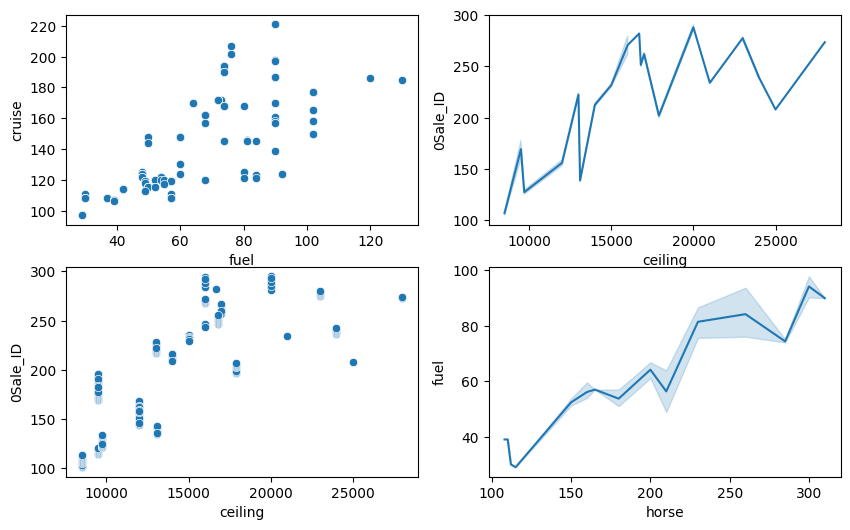

In [22]:


def subos(dataframe):
  fig,axs = plt.subplots(2,2,figsize=(10,6))
  sns.scatterplot(x='fuel',y='cruise',ax=axs[0,0],data=airplane_perf)
  sns.lineplot(x='ceiling',y='0Sale_ID',ax=axs[0,1],data=airplane_perf)
  sns.scatterplot(x='ceiling',y='0Sale_ID',ax=axs[1,0],data=airplane_perf)
  sns.lineplot(x='horse',y='fuel',ax=axs[1,1],data=airplane_perf)
  plt.show()



subos(airplane_perf)






In [23]:
##^^^ BAD

airplane_full = pd.concat([airplane_specs,airplane_perf,airplane_sales],axis=1)
airplane_full.describe()



,0Sale_ID,pass,wtop,fixgear,tdrag,0Sale_ID,horse,fuel,ceiling,cruise,0Sale_ID,age,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,198.000000,4.287179,0.461538,0.451282,0.056410,198.000000,219.210256,67.794872,14006.666667,144.738462,198.000000,24.610256,50236.733333
std,56.435804,1.331455,0.499802,0.498902,0.231306,56.435804,60.512348,20.284801,4503.229845,31.277084,56.435804,6.952853,41470.291455
min,101.000000,2.000000,0.000000,0.000000,0.000000,101.000000,108.000000,29.000000,8500.000000,97.000000,101.000000,13.000000,9000.000000
25%,149.500000,4.000000,0.000000,0.000000,0.000000,149.500000,180.000000,51.000000,9700.000000,119.000000,149.500000,19.000000,19250.000000
50%,198.000000,4.000000,0.000000,0.000000,0.000000,198.000000,210.000000,68.000000,13000.000000,144.000000,198.000000,22.000000,33500.000000
75%,246.500000,6.000000,1.000000,1.000000,0.000000,246.500000,285.000000,84.000000,16800.000000,170.000000,246.500000,30.000000,73500.000000
max,295.000000,6.000000,1.000000,1.000000,1.000000,295.000000,310.000000,130.000000,28000.000000,221.000000,295.000000,44.000000,254000.000000


In [24]:
airplane_full.duplicated().sum()

0

In [25]:
airplane_full.isna().sum()

,0
0Sale_ID,0
pass,0
wtop,0
fixgear,0
tdrag,0
0Sale_ID,0
horse,0
fuel,0
ceiling,0
cruise,0


In [26]:
## duplicated columns again
airplane_full = airplane_full.loc[:,~airplane_full.columns.duplicated()].copy()
airplane_full.columns.duplicated().sum()





0

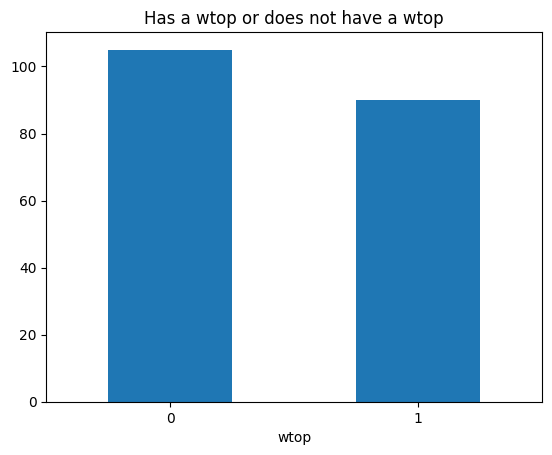

In [27]:
airplane_full['wtop'].value_counts().plot(kind='bar',rot=0)
plt.title("Has a wtop or does not have a wtop")
plt.show()

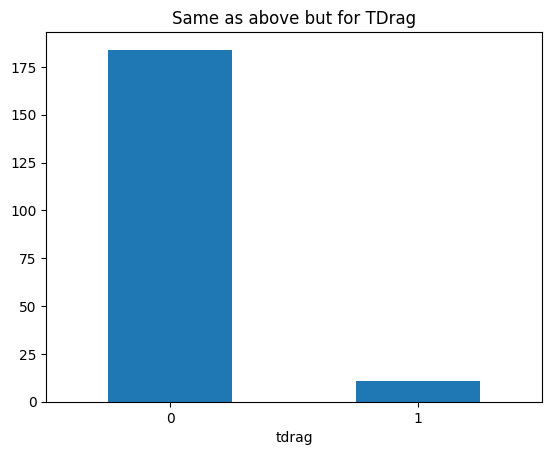

In [28]:
airplane_full['tdrag'].value_counts().plot(kind='bar',rot=0)
plt.title("Same as above but for TDrag")
plt.show()

In [29]:
X = airplane_full.drop("price",axis=1)
y = airplane_full['price']

model3 = sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print("results from all dataframes combined\n",model3.summary())



results from all dataframes combined
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     45.17
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.51e-44
Time:                        16:19:56   Log-Likelihood:                -2228.7
No. Observations:                 195   AIC:                             4479.
Df Residuals:                     184   BIC:                             4515.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.

In [30]:
lr_full = LinearRegression().fit(X,y)
lr_full_pred = lr_full.predict(X)
print("R2 score from Linear Regression model all of all datasets combined\n",(r2_score(y,lr_full_pred)*100))

# not doing that whole thing again, ok, 15 minutes in and woke up two hours ago







R2 score from Linear Regression model all of all datasets combined
 71.0554781295652


In [31]:
#making logs for all variables for no good reason
import numpy as np

def get_log_values(airplane_full):
  return np.log1p(airplane_full)



airplane_full['log_price'] = get_log_values(airplane_full['price'])
airplane_full['log_age'] = get_log_values(airplane_full['age'])
airplane_full['log_horse'] = get_log_values(airplane_full['horse'])
airplane_full['log_fuel'] = get_log_values(airplane_full['fuel'])
airplane_full['log_ceiling'] = get_log_values(airplane_full['ceiling'])
airplane_full['log_cruise'] = get_log_values(airplane_full['cruise'])








In [32]:
airplane_full.isna().sum()






,0
0Sale_ID,0
pass,0
wtop,0
fixgear,0
tdrag,0
horse,0
fuel,0
ceiling,0
cruise,0
age,0


In [33]:
airplane_full.duplicated().sum()



0

In [34]:
airplane_full['log_fuel'].describe()

,log_fuel
count,195.000000
mean,4.185252
std,0.310427
min,3.401197
25%,3.951059
50%,4.234107
75%,4.442651
max,4.875197


In [35]:
airplane_full['log_horse'].describe()

,log_horse
count,195.000000
mean,5.354369
std,0.290447
min,4.691348
25%,5.198497
50%,5.351858
75%,5.655992
max,5.739793


In [36]:
airplane_full['log_fuel'].describe()

,log_fuel
count,195.000000
mean,4.185252
std,0.310427
min,3.401197
25%,3.951059
50%,4.234107
75%,4.442651
max,4.875197


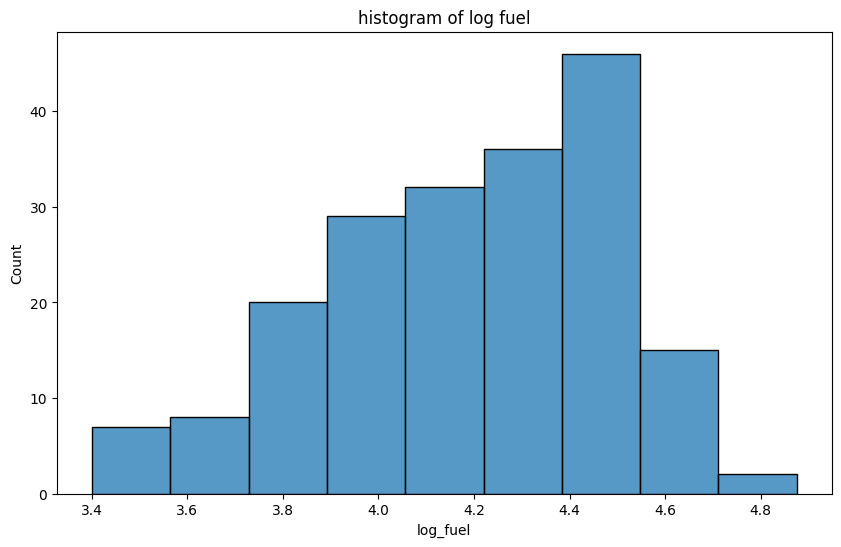

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(airplane_full['log_fuel'])
plt.title("histogram of log fuel")
plt.show()




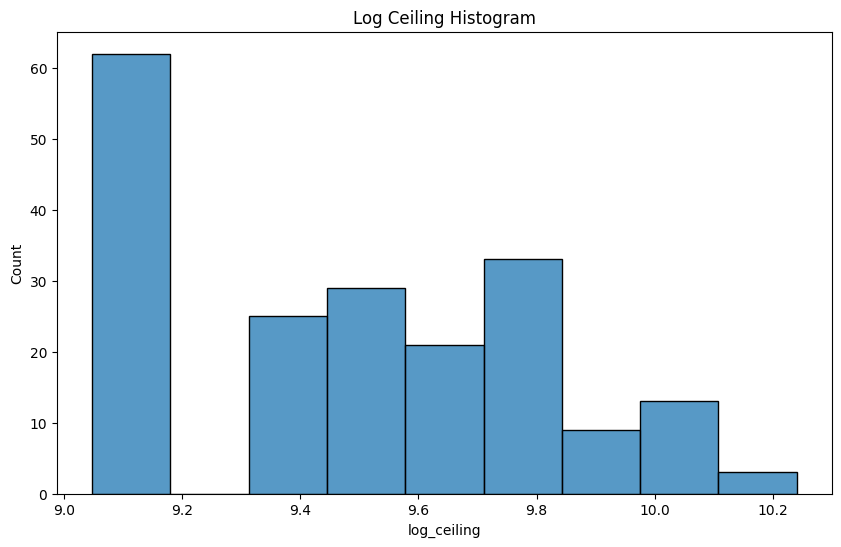

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(airplane_full['log_ceiling'])
plt.title("Log Ceiling Histogram")
plt.show()

In [39]:
airplane_full['log_cruise'].describe()

,log_cruise
count,195.000000
mean,4.959890
std,0.207952
min,4.584967
25%,4.787492
50%,4.976734
75%,5.141664
max,5.402677


In [40]:
#### log price as y

X = airplane_full.drop('log_price',axis=1)
y = airplane_full['log_price']


In [41]:
model5 = sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     496.7
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          2.09e-138
Time:                        16:19:58   Log-Likelihood:                 144.49
No. Observations:                 195   AIC:                            -255.0
Df Residuals:                     178   BIC:                            -199.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.0726      4.002     -2.017      